 ### Supervised Learning and Ensembles 

**Introduction-**
This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. 
This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

**Objective:**
Build a model that will help them identify the potential customers who have higher probability of purchasing the loan.
This will increase the success ratio while at the same time reduce the cost of the campaign.

### Data Source
Bank_Personal_Loan_Modelling-1.xlsx

# Q1. Read the column description and ensure you understand each attribute well.

### Data Dictionary
Data Fields-
1. ID - Customer ID (Unique ID)
2. Age - Customer's age in completed years (Continous data)
3. Experience - #years of professional experience (Continous data)
4. Income - Annual income of the customer (000) (Continous data)
5. ZIPCode - Home Address ZIP code (Continous data)
6. Family - Family size of the customer (Continous data)
7. CCAvg - Avg. spending on credit cards per month (000) (Continous data)
8. Education - Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional (Categorical data)
9. Mortgage - Value of house mortgage if any. (000) (Continous data)
10. **Personal Loan** - Did this customer accept the personal loan offered in the last campaign? (Categorical data)- This is our **Target Variable**
11. Securities Account - Does the customer have a securities account with the bank? (Categorical data)
12. CD Account - Does the customer have a certificate of deposit (CD) account with the bank? (Categorical data)
13. Online - Does the customer use internet banking facilities? (Categorical data)
14. CreditCard - Does the customer use a credit card issued by UniversalBank? (Categorical data)

From the above Data Dictionary we observe that there are 14 liability customer variables listed in the dataset.

Y = Personal Loan will be our Dependent/Target variable

X = Remaining features will be considered as Independent variables (Note- ID, ZIPCode will be taken care of during the exercise)

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import ExcelWriter
from pandas import ExcelFile
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# To calculate accuracy measures and confusion matrix
from sklearn import metrics

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#Ensemble method
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
%matplotlib inline

### Data Ingestion

In [2]:
bank_df = pd.read_csv('../data/Bank_Personal_Loan_Modelling.csv')
df = bank_df.copy(deep=True)

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
df.rename(columns={'Personal Loan': 'Personal_Loan'}, inplace=True)

In [5]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
# Check for missing values
print('Number of missing values across columns-\n', df.isnull().sum())

Number of missing values across columns-
 ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


# Q2. Study the data distribution in each attribute, share your findings.
# Q3. Get the target column distribution. Your comments.

### As part of studying each attribute, we will look at the data individually as well as against the target variable distribution
1. BoxPlots for each attribute and against target column
2. T-Test to validate hypothesis
3. Handling outliers basis data distribution (if any)
4. Understanding Categorical data i.e., Family size, Education categories, Securities (y/n), Online (y/n), CD (y/n) to determine  historical relative frequency (Probabilty) across these variables to provide a 'Loan Response Rate'

In [8]:
# Summary statistics of numeric data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Observations-
1. ID, Zip Code fields needs to be removed from thee dataset as these not irrelevant for this excercise 
2. Experience fields has some negative values which needs to be imputed
3. No missing value observed in the dataset
4. Based on Max value of Income, Mortgage and CCAvg - Suspect Outliers which will be investigated during the excercise

In [15]:
# Studying Data Distribution of every attribute using a BoxPlot to review distribution and Outliers in the dataset 

<Axes: xlabel='Age'>

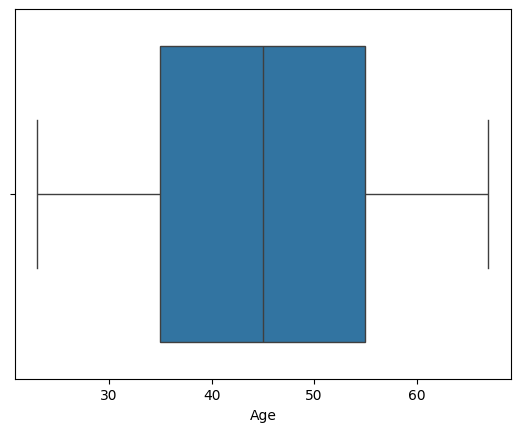

In [9]:
sns.boxplot(x='Age', data=df)

<Axes: xlabel='Personal_Loan', ylabel='Age'>

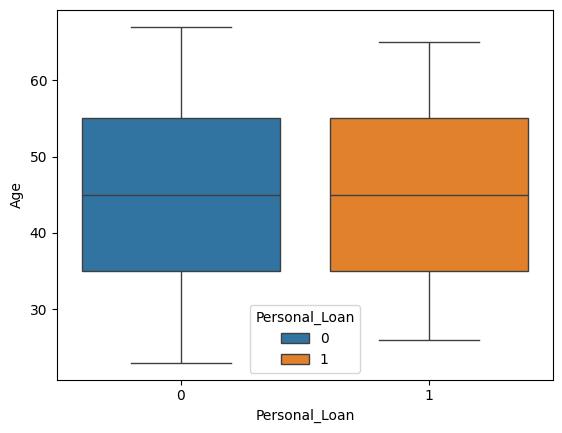

In [10]:
sns.boxplot(x='Personal_Loan', y='Age', hue='Personal_Loan', data=df)

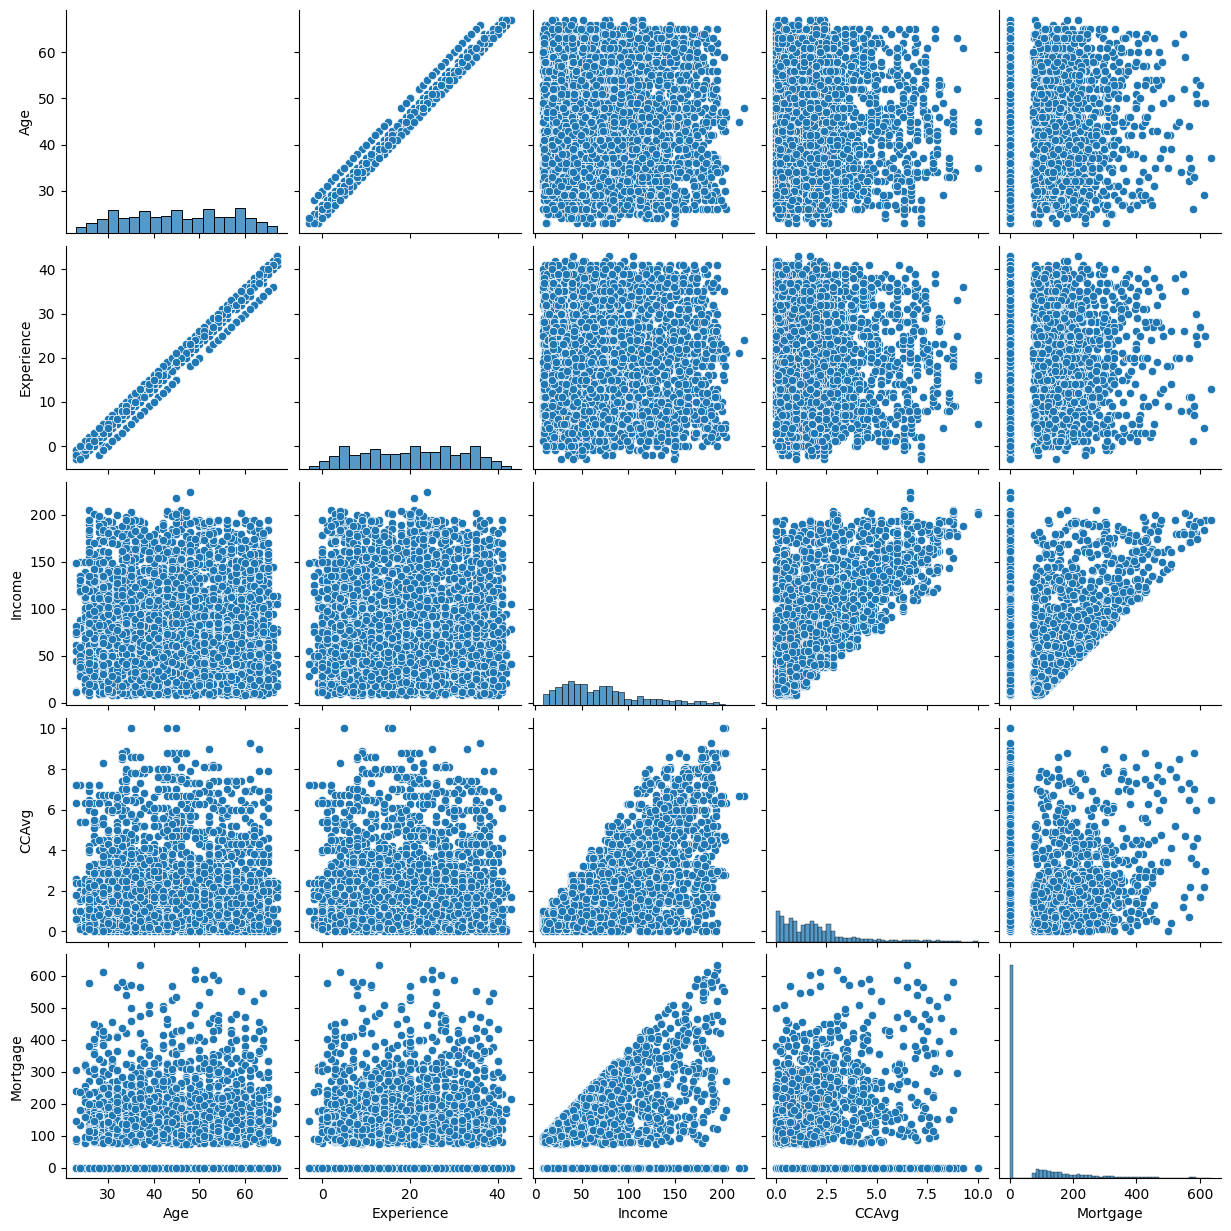

In [11]:
# Pair-plots of continuous variables
sns.pairplot(df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']])

In [12]:
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024672,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050089,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004068,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024672,-0.052030,-0.050089,0.645993,-0.004068,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


<Axes: xlabel='Personal_Loan', ylabel='count'>

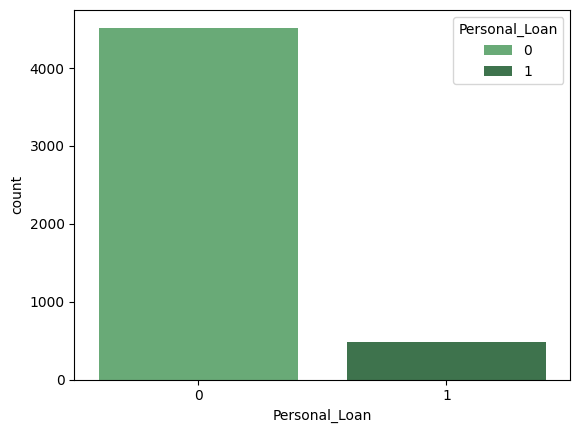

In [13]:
sns.countplot(x='Personal_Loan', data=df, palette="Greens_d", hue='Personal_Loan')

In [14]:
pd.value_counts(df['Personal_Loan'].values, sort=False)

0    4520
1     480
dtype: int64

**Only (480/5000) = 9.6% of customers accepted the personal loan offered in the last campaign.**

In [15]:
# Standardise data 
df.apply(lambda x: (x-np.mean(x))/(np.std(x)))
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [16]:
Y_labels = ['0', '1']

Text(0.5, 1.0, 'Correlation between different features of dataset\n')

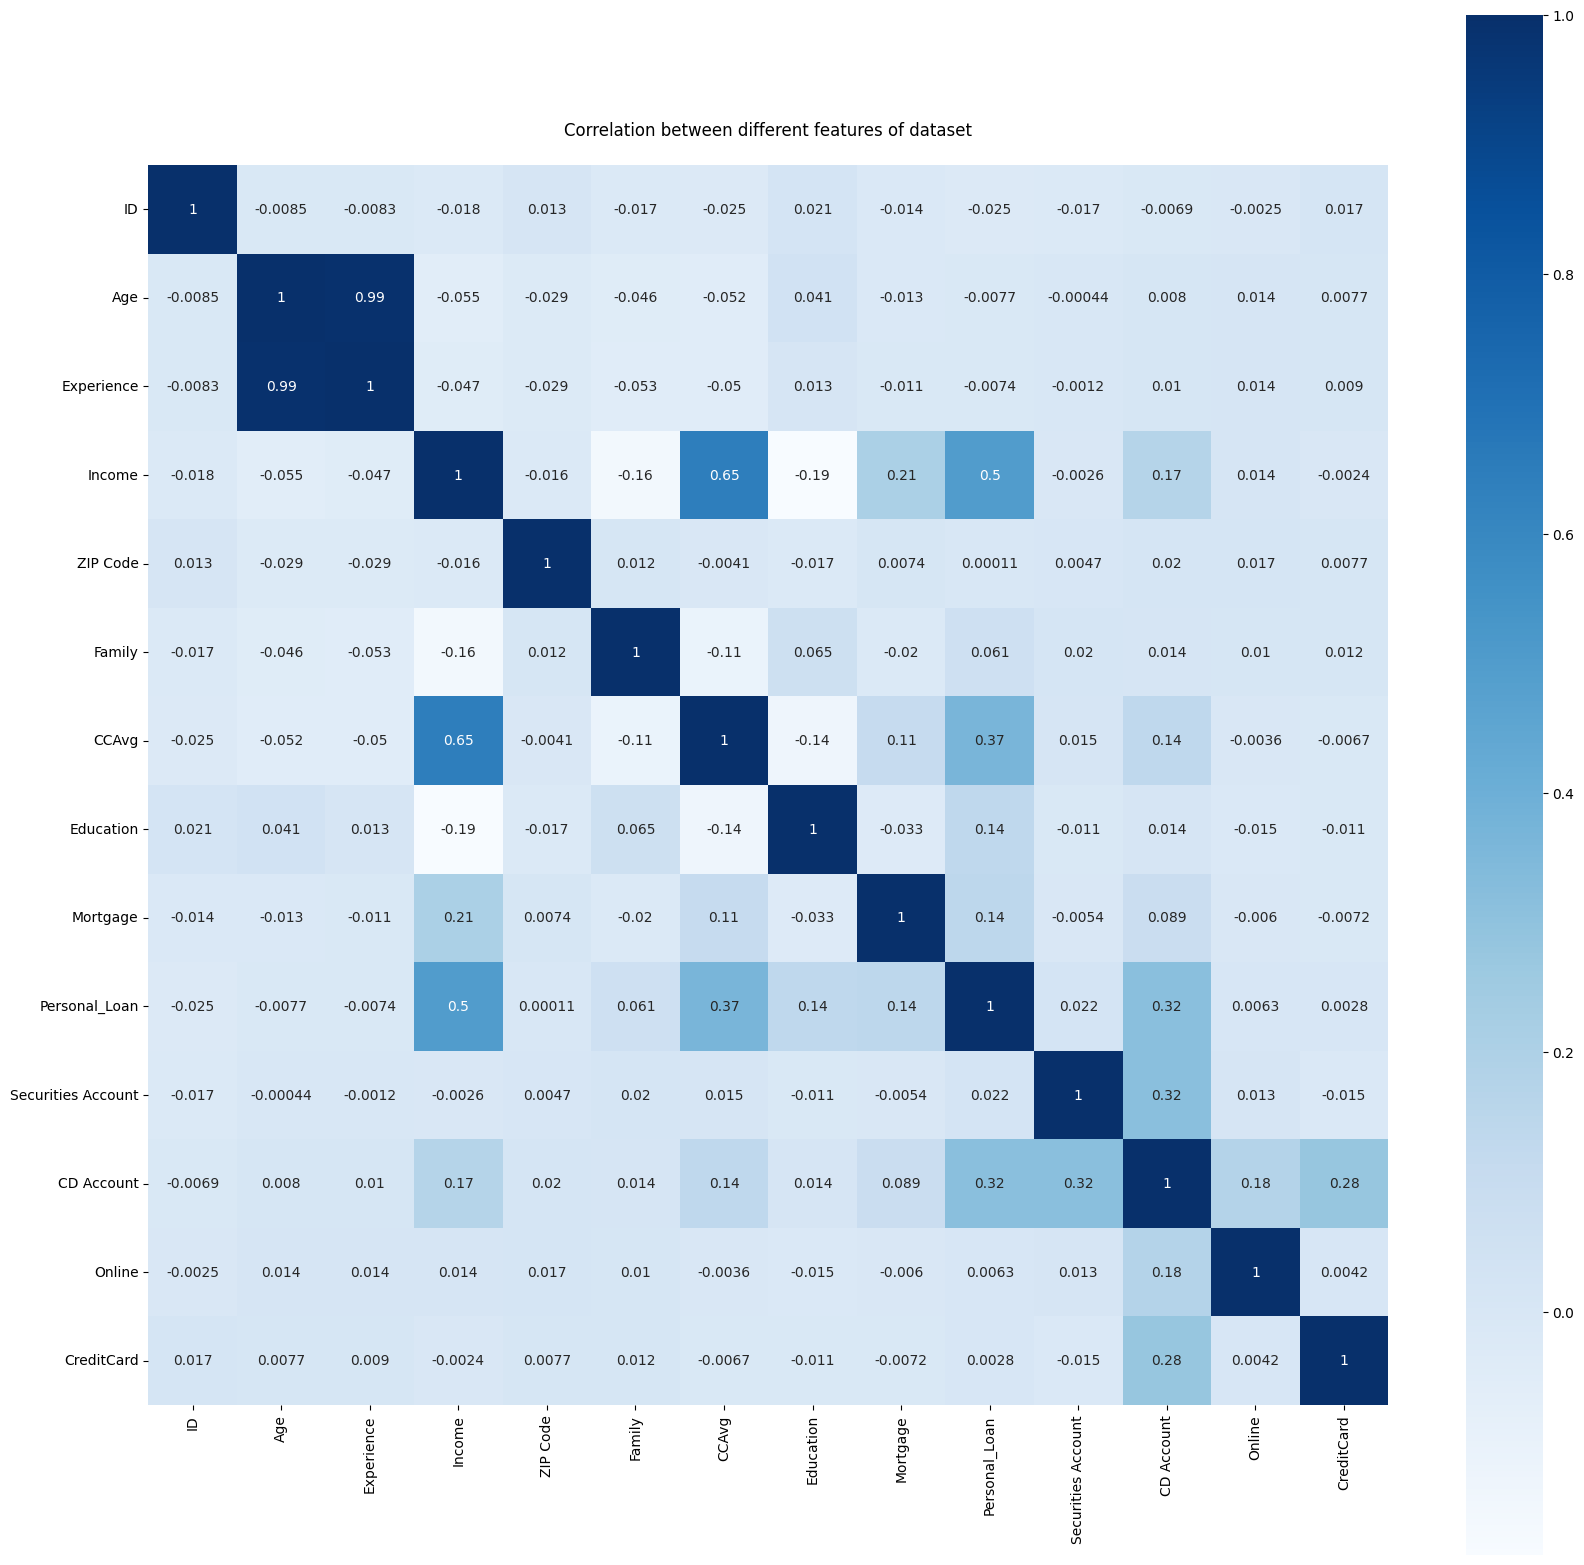

In [17]:
#Correlation matrix
correlation = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='Blues')
plt.title('Correlation between different features of dataset\n')

##### Observation:
1. **Age** and **Experience** have very strong positive correlation of 0.99 (In order to avoid the impact of mult-collinearity, you can use either 'Age' or 'Experience' variable in Logistic regression model as both are highly correlated).
2. **Income** and **CCAvg** have strong positive correlation of 0.64
3. **Income** and **Personal Loan** have positive correlation of 0.50
4. **CCAvg** and **Personal Loan** have positive correlation of 0.38

# Q4. Split the data into training and test set in the ratio of 70:30 respectively.

### Splitting data into Train and Test set

In [18]:
# Splitting 70% of the records from the dataset for training and 30% for testing 
from sklearn.model_selection import train_test_split
Y = df['Personal_Loan']
X = df.drop(['ID', 'ZIP Code', 'Personal_Loan'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=5)

# Q5. Use a classification model to predict the likelihood of a liability customer buying personal loans
1. Feature Selection
2. Build multiple Classification Models to compare accuracy 
    a) Logistic Regression
    b) Gaussian Naive Bayes
    c) K-Nearest Neighbor
    d) SVM
    e) Decision Tree
3. Summarize Comparitive Accuracy and Best Model    

##### Feature Selection for Logistic Regression

In [19]:
from sklearn.feature_selection import SelectPercentile

# 70% of the features/predictors are being selected in the model 
# which are considered as the important predictors of the target variable('Personal Loan')

select = SelectPercentile(percentile=70)
select.fit(X_train, Y_train)
X_train_trans = select.transform(X_train)
X_test_trans = select.transform(X_test)

print('X_train_trans.shape ', X_train_trans.shape)
print('X_train_trans.shape ', X_train_trans.shape)

mask = select.get_support()
print(mask)
print()
print('\nSelected features from the dataset for Logistic Regression model are below:\n')
print(X_train.columns[mask])

X_train_trans.shape  (3500, 7)
X_train_trans.shape  (3500, 7)
[False False  True  True  True  True  True  True  True False False]


Selected features from the dataset for Logistic Regression model are below:

Index(['Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Securities Account', 'CD Account'],
      dtype='object')



Logistic Regression model accuracy score =  0.9446666666666667

Test labels, Predicted labels


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

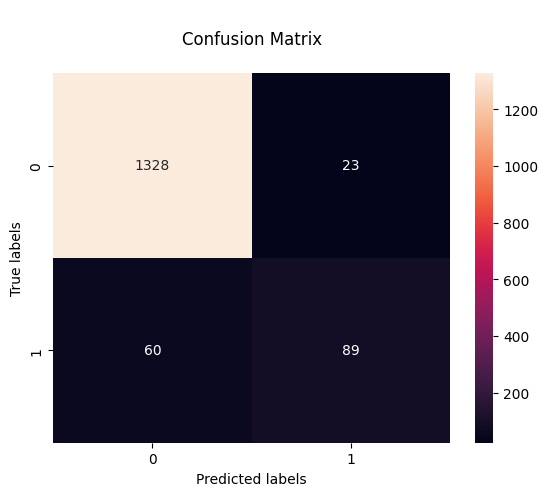

In [20]:
logit_model = LogisticRegression()
logit_model.fit(X_train_trans, Y_train)
accuracy1 = logit_model.score(X_test_trans, Y_test)
Y_predicted1 = logit_model.predict(X_test_trans)
print('\nLogistic Regression model accuracy score = ', accuracy1)
print('\nTest labels, Predicted labels')
y_grid1 = (np.column_stack([Y_test, Y_predicted1]))
#print(y_grid1)

cm = metrics.confusion_matrix(Y_test, Y_predicted1)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])


Gaussian Navie Bayes Model accuracy =  0.8746666666666667

Test labels, Predicted labels
[[0 0]
 [0 0]
 [0 1]
 ...
 [1 1]
 [0 0]
 [0 0]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

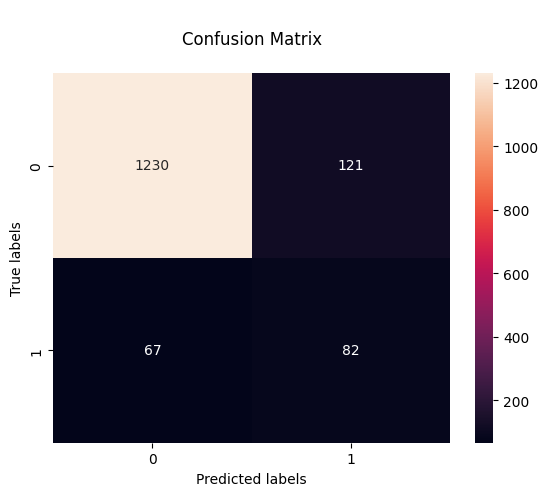

In [21]:
# Gaussian Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, Y_train)
accuracy2 = gnb_clf.score(X_test, Y_test)
Y_predicted2 = gnb_clf.predict(X_test)
print('\nGaussian Navie Bayes Model accuracy = ', accuracy2)
print('\nTest labels, Predicted labels')
y_grid2 = (np.column_stack([Y_test, Y_predicted2]))
print(y_grid2)

cm = metrics.confusion_matrix(Y_test, Y_predicted2)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])


KNN Model accuracy =  0.9086666666666666

Test labels, Predicted labels
[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 0]
 [0 0]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

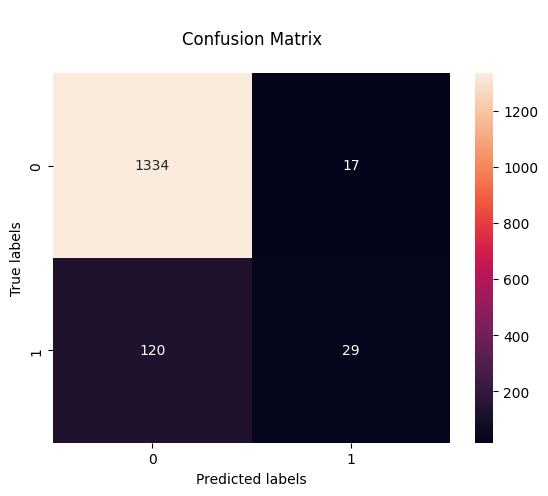

In [22]:
# K-Nearest Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 10, metric='euclidean')
knn_clf.fit(X_train, Y_train)
accuracy3 = knn_clf.score(X_test, Y_test)
Y_predicted3 = knn_clf.predict(X_test)
print('\nKNN Model accuracy = ', accuracy3)
print('\nTest labels, Predicted labels')
y_grid3 = (np.column_stack([Y_test, Y_predicted3]))
print(y_grid3)


cm = metrics.confusion_matrix(Y_test, Y_predicted3)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])


Score of the KNN model will be highest when n_neighbors =  5

Score of the KNN model will be highest when n_neighbors =  10

Score of the KNN model will be highest when n_neighbors =  15

Score of the KNN model will be highest when n_neighbors =  35


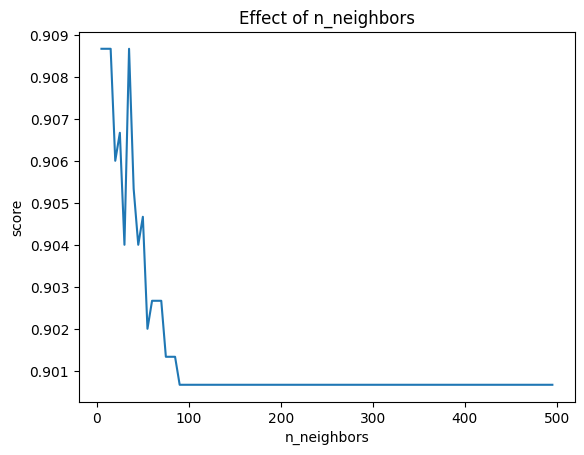

In [23]:
knn_clf = KNeighborsClassifier(n_jobs=-1, metric = 'euclidean')
k_neighbors = np.arange(5, 500, 5)
scores = []

for n in k_neighbors:
    knn_clf.set_params(n_neighbors=n)
    knn_clf.fit(X_train, Y_train)
    scores.append(knn_clf.score(X_test, Y_test))   
    
i=0
for score in scores:
    if score==max(scores):
        print('\nScore of the KNN model will be highest when n_neighbors = ', k_neighbors.tolist()[i])       
    i=i+1

plt.title('Effect of n_neighbors')
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.plot(k_neighbors, scores)
plt.show()


KNN Model accuracy =  0.9086666666666666

Test labels, Predicted labels
[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 0]
 [0 0]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

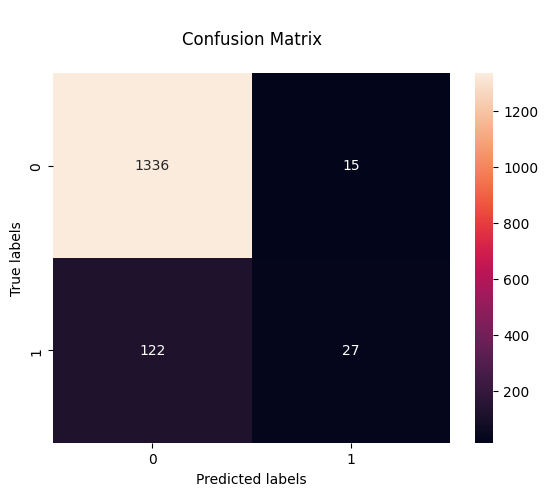

In [24]:
knn_clf = KNeighborsClassifier(n_neighbors = 35, metric='euclidean')
knn_clf.fit(X_train, Y_train)
accuracy4 = knn_clf.score(X_test, Y_test)
Y_predicted4 = knn_clf.predict(X_test)
print('\nKNN Model accuracy = ', accuracy4)
print('\nTest labels, Predicted labels')
y_grid4 = (np.column_stack([Y_test, Y_predicted4]))
print(y_grid4)


cm = metrics.confusion_matrix(Y_test, Y_predicted4)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])


SVM (Classifier) Model accuracy  =  0.9033333333333333

Test labels, Predicted labels
[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 0]
 [0 0]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

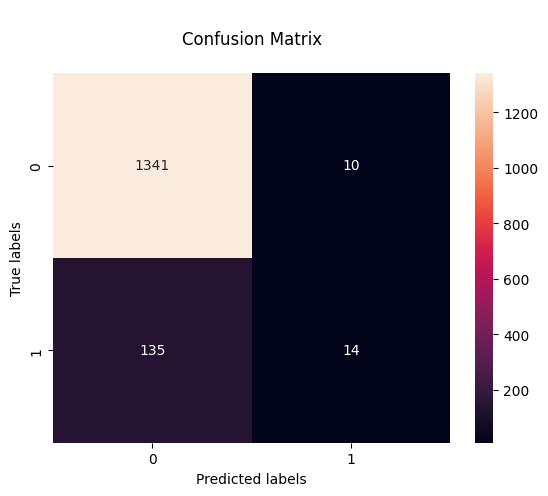

In [39]:
# Support Vector Machine for Classification

from sklearn import metrics
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, Y_train)
accuracy5 = svm_clf.score(X_test, Y_test)
Y_predicted5 = svm_clf.predict(X_test)

print('\nSVM (Classifier) Model accuracy  = ', accuracy5)
print('\nTest labels, Predicted labels')
y_grid5 = (np.column_stack([Y_test, Y_predicted5]))
print(y_grid5)


cm = metrics.confusion_matrix(Y_test, Y_predicted5)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])


Decision Tree Model accuracy =  0.9826666666666667

Test labels, Predicted labels
[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 0]
 [0 0]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

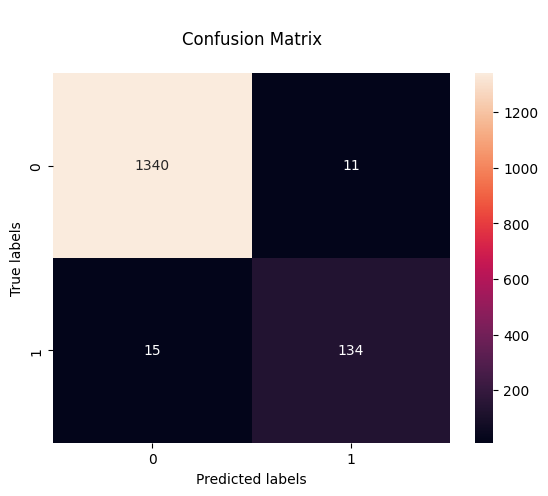

In [25]:
# Decision Tree Classifier

dt_clf = DecisionTreeClassifier(criterion = 'entropy')
dt_clf.fit(X_train, Y_train)
accuracy6 = dt_clf.score(X_test , Y_test)
Y_predicted6 = dt_clf.predict(X_test)
print('\nDecision Tree Model accuracy = ', accuracy6)
print('\nTest labels, Predicted labels')
y_grid6 = (np.column_stack([Y_test, Y_predicted6]))
print(y_grid6)


cm = metrics.confusion_matrix(Y_test, Y_predicted6)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])


Score of the Decision Tree model will be highest when max_depth =  5


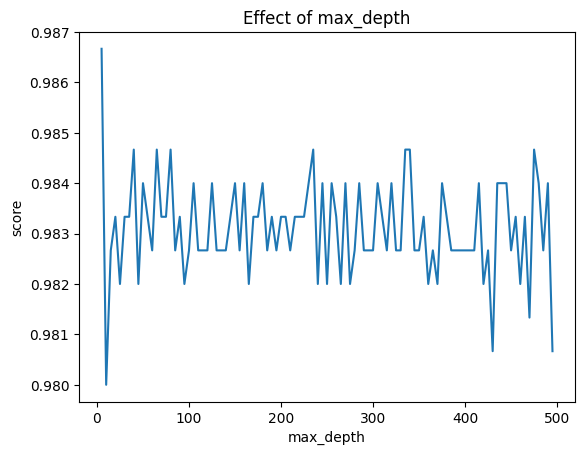

In [26]:
dt_clf = DecisionTreeClassifier(criterion = 'entropy')
max_depth_est = np.arange(5, 500, 5)
scores = []

for n in max_depth_est:
    dt_clf.set_params(max_depth=n)
    dt_clf.fit(X_train, Y_train)
    scores.append(dt_clf.score(X_test, Y_test))   
    
i=0
for score in scores:
    if score==max(scores):
        print('\nScore of the Decision Tree model will be highest when max_depth = ', max_depth_est.tolist()[i])
    i=i+1

plt.title('Effect of max_depth')
plt.xlabel('max_depth')
plt.ylabel('score')
plt.plot(max_depth_est, scores)
plt.show()


Decision Tree Model accuracy =  0.9866666666666667

Test labels, Predicted labels
[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 0]
 [0 0]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

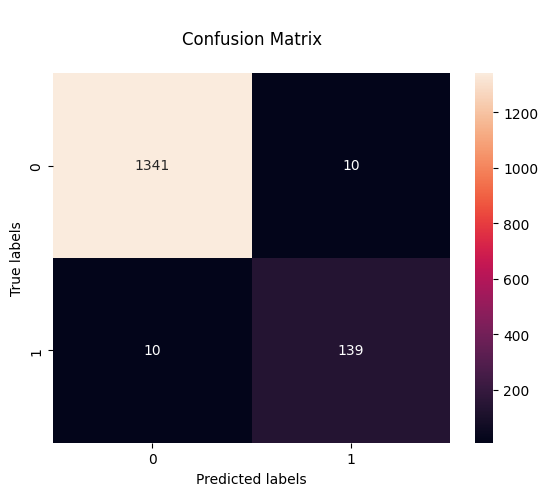

In [27]:
dt_clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
dt_clf.fit(X_train, Y_train)
accuracy7 = dt_clf.score(X_test , Y_test)
Y_predicted7 = dt_clf.predict(X_test)
print('\nDecision Tree Model accuracy = ', accuracy7)
print('\nTest labels, Predicted labels')
y_grid7 = (np.column_stack([Y_test, Y_predicted7]))
print(y_grid7)


cm = metrics.confusion_matrix(Y_test, Y_predicted7)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

##### Models Validation: Calculating ROC and AUC values for different models

In [28]:
from sklearn.metrics import roc_curve, auc

# Model Validation for Logistic Regression
# Determine the false positive and true positive rates
fpr1, tpr1, _ = roc_curve(Y_test, logit_model.predict_proba(X_test_trans)[:,1])
roc_auc1 = auc(fpr1, tpr1) # Calculate the AUC
print ('Logistic Regression Model Accuracy: ', accuracy1)
print ('ROC AUC - LogR: ',roc_auc1)

# Model Validation for KNN
# Determine the false positive and true positive rates
fpr3, tpr3, _ = roc_curve(Y_test, knn_clf.predict_proba(X_test)[:,1])
roc_auc3 = auc(fpr3, tpr3) # Calculate the AUC
print ('KNN Model Accuracy (k=35): ', accuracy4)
print ('ROC AUC - kNN: ',roc_auc3)

# Model Validation for Decision Tree
# Determine the false positive and true positive rates
fpr5, tpr5, _ = roc_curve(Y_test, dt_clf.predict_proba(X_test)[:,1])
roc_auc5 = auc(fpr5, tpr5) # Calculate the AUC
print ('Decision Tree Model (Depth-5)  Accuracy: ', accuracy7)
print ('ROC AUC - Decision Tree: ',roc_auc5)

Logistic Regression Model Accuracy:  0.9446666666666667
ROC AUC - LogR:  0.955320195331323
KNN Model Accuracy (k=35):  0.9086666666666666
ROC AUC - kNN:  0.920863988395372
Decision Tree Model (Depth-5)  Accuracy:  0.9866666666666667
ROC AUC - Decision Tree:  0.9920218182902051


# Q6. Explain why you chose one model over the other (do not use ensemble techniques yet).

**Response- We build different models (i.e., SVM, kNN, Logistic Regression and Decision Tree) and 
chose Decision Tree based Model accuracy of  98.6% and ROC_AUC score of 99.20%, which was much higher than other models as listed in the above table.**

**Logistic Regression**

Advantages: 
1. Makes no assumptions about distributions of classes in feature space 
2. Easily extended to multiple classes (multinomial regression) 
3. Natural probabilistic view of class predictions 
4. Quick to train 
5. Very fast at classifying unknown records 
6. Good accuracy for many simple data sets 
7. Resistant to overfitting 
8. Can interpret model coefficients as indicators of feature importance

Disadvantages: 
1. Constructs linear boundaries



**Naive Bayes Classifier**

Advantages:
1. Simple, fast in processing and effective 
2. Does well with noisy data and missing data 
3. Requires few examples for training  (assuming the data set is a true representative of the population) 
4. Easy to obtain estimated probability for a prediction

Disadvantages: 
1. Relies on and often incorrect assumption of independent features 
2. Not ideal for data sets with large number of numerical attributes 
3. Estimated probabilities are less reliable in practice than predicted classes 
4. If rare predictor value is not captured in the training set but appears in the test set the probability calculation will be incorrect



**K-Nearest Neighbors Classifer**

Advantages: 
1. Makes no assumptions about distributions of classes in feature space 
2. Can work for multi classes simultaneously 
3. Easy to implement and understand 
4. Not impacted by outliers

Disadvantages: 
1. Fixing the optimal value of K is a challenge 
2. Will not be effective when the class distributions overlap 
3. Does not output any models. Calculates distances for every new point (lazy learner) 
4. Computationally intensive (O(D(N^2))), can be addressed using KD algorithms which take time to prepare



**SVM Classifier**

Advantages:
1. Accuracy
2. Works well on smaller cleaner datasets
3. It can be more efficient because it uses a subset of training points

Disadvatages:
1. It is not suited to larger datasets as the training time with SVMs can be high
2. Less effective on noisier datasets with overlapping classes



**Decision Tree Classifier**

Advantages:
1. Simple, fast in processing and effective 
2. Does well with noisy data and missing data 
3. Handles numeric and categorical variables 
4. Interpretation of results does not required mathematical or statistical knowledge

Disadvantages:
1. Often biased towards splits or features have large number of levels 
2. May not be optimum as modelling some relations on axis parallel basis is not optimal 
3. Small changes in training data can result in large changes to the logic 
4. Large trees can be difficult to interpret 

# Q7. Use ensemble techniques to improve the performance.

### Ensemble methods
To combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator. Two families of ensemble methods are usually distinguished:
1. **Boosting methods** based estimators are built sequentially and one tries to reduce the bias of the combined estimator. The motivation is to combine several weak models to produce a powerful ensemble. 
**Ex: AdaBoost**
2. **Averaging(Bagging) methods**: the driving principle is to build several estimators independently and then to average / vote  their predictions. On average, the combined estimator is usually better than any of the single base estimator because its variance is reduced. 
**Ex: Random Forest**

In [30]:
#Boosting Algorithm: AdaBoost Classifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection

dt = DecisionTreeClassifier() 
AdaBoost_clf = AdaBoostClassifier(base_estimator=dt)# decision tree is used as a base estimator
AdaBoost_clf.fit(X_train,Y_train)
accuracy8 = AdaBoost_clf.score(X_test, Y_test)
Y_predicted8 = AdaBoost_clf.predict(X_test)
print('\nAdaBoost Model accuracy = ', accuracy8)
print('\nTest labels, Predicted labels')
y_grid8 = (np.column_stack([Y_test, Y_predicted8]))
print(y_grid8)


cm = metrics.confusion_matrix(Y_test, Y_predicted8)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])    

TypeError: AdaBoostClassifier.__init__() got an unexpected keyword argument 'base_estimator'

In [49]:
#Cross-validation of AdaBoost model

kfold = model_selection.KFold(n_splits=10)
AdaBoost_clf = AdaBoostClassifier(random_state=7)
accuracy8 = model_selection.cross_val_score(AdaBoost_clf, X, Y, cv=kfold)
print('\nCross-validation: AdaBoost model accuracy = ', accuracy8.mean())


Cross-validation: AdaBoost model accuracy =  0.9677999999999999



Random Forest Model accuracy =  0.9866666666666667

Test labels, Predicted labels
[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 0]
 [0 0]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

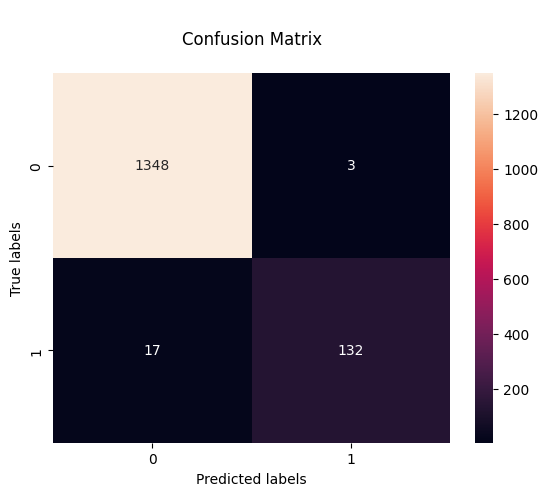

In [31]:
#Bagging Algorithm: Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(criterion = 'gini')
rf_clf = rf_clf.fit(X_train, Y_train)
accuracy9 = rf_clf.score(X_test, Y_test)
Y_predicted9 = rf_clf.predict(X_test)
print('\nRandom Forest Model accuracy = ', accuracy9)
print('\nTest labels, Predicted labels')
y_grid9 = (np.column_stack([Y_test, Y_predicted9]))
print(y_grid9)


cm = metrics.confusion_matrix(Y_test, Y_predicted9)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

## FP : Predicting that the person will take a loan (1) whereas actual label is 0 
## FN : Predicting that the person will take not take a loan 0  whereas actual label is 1. 




Score of the Random Forest model will be highest when n_estimators(no. of trees) =  20


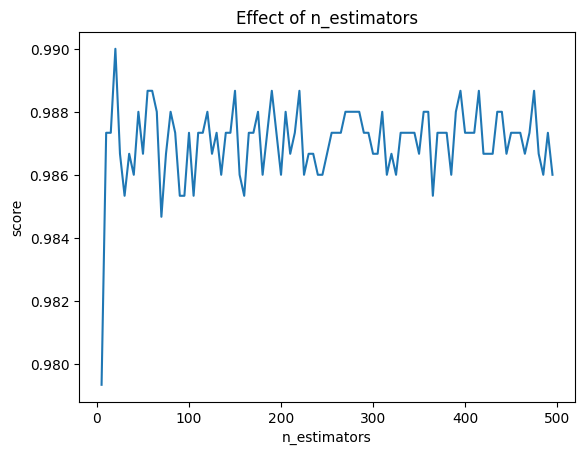

In [32]:
rf_clf = RandomForestClassifier(criterion = 'gini')
estimators = np.arange(5, 500, 5)
scores = []

for n in estimators:
    rf_clf.set_params(n_estimators=n)
    rf_clf.fit(X_train, Y_train)
    scores.append(rf_clf.score(X_test, Y_test))   
    
i=0
for score in scores:
    if score==max(scores):
        print('\nScore of the Random Forest model will be highest when n_estimators(no. of trees) = ', estimators.tolist()[i])
    i=i+1

plt.title('Effect of n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.plot(estimators, scores)
plt.show()


Random Forest Model accuracy =  0.986

Test labels, Predicted labels
[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 0]
 [0 0]]


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

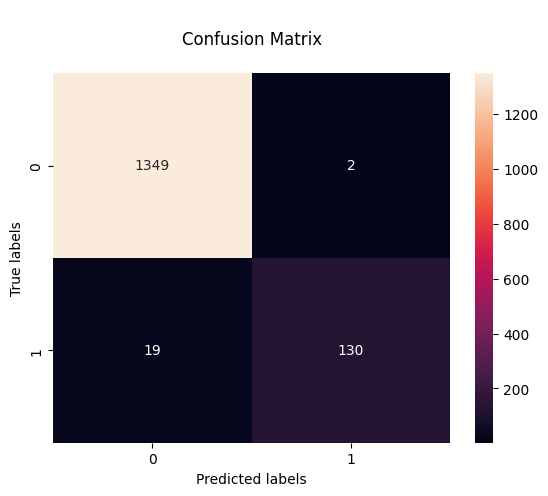

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(criterion = 'gini', n_estimators=60)
rf_clf = rf_clf.fit(X_train, Y_train)
accuracy10 = rf_clf.score(X_test, Y_test)
Y_predicted10 = rf_clf.predict(X_test)
print('\nRandom Forest Model accuracy = ', accuracy10)
print('\nTest labels, Predicted labels')
y_grid10 = (np.column_stack([Y_test, Y_predicted10]))
print(y_grid10)


cm = metrics.confusion_matrix(Y_test, Y_predicted10)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt=''); #annot=True to annotate cells
# title, labels and ticks
ax.set_title('\nConfusion Matrix\n')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

##### Feature Importance from Random Forest Model (this model has the highest accuracy of 98.73%)

In [34]:
indices = np.argsort(rf_clf.feature_importances_)[::-1]

In [35]:
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(X_train.shape[1]):
  feature_rank.loc[f] = [f+1,
                         X_train.columns[indices[f]],
                         rf_clf.feature_importances_[indices[f]]]


<Axes: xlabel='importance', ylabel='feature'>

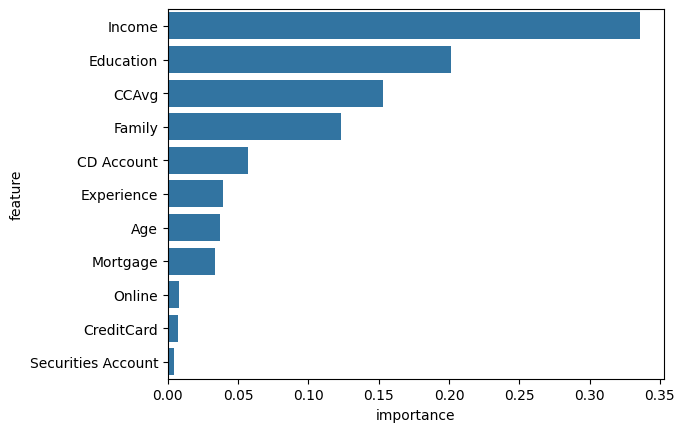

In [36]:
sns.barplot( y = 'feature', x = 'importance', data = feature_rank )

##### Note:

As per the model, the most important features which influence the customer in taking personal loan are listed below:

1. Income
2. Education level
3. CCAvg (Avg. spending on credit cards per month (thousand dollars))
4. Family size
5. CD Account (having certificate of deposit (CD) account or not)
6. Age
7. Mortgage